In [1]:
#CONNEXION à google drive
import pandas as pd
from google.colab import drive

drive.mount('/Drive')

Mounted at /Drive


In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [110]:
#CHARGEMENT des fichiers
#dataset_cleaned.csv dot avoir été généré depuis le notebook "cleaning"
import re  
path = '/Drive/My Drive/Projet Rakuten'
df = pd.read_csv(f'{path}/dataset_cleaned.csv', index_col=0) 
df = df.replace({'prdtypecode': {10: 1, 2280:2,   50:3, 1280:4, 2705:5, 2522:6, 2582:7, 1560:8, 1281:9, 1920:10, 2403:11,
       1140:12, 2583:13, 1180:14, 1300:15, 2462:16, 1160:17, 2060:18,   40:19,   60:20, 1320:21, 1302:22,
       2220:23, 2905:24, 2585:25, 1940:26, 1301:0}})
#valeurs MANQUANTES
df['description']=df['description'].fillna("")
df['designation']=df['designation'].fillna("")
df=df.replace({'n°': 'numéro '}, regex=True)
df=df.replace({"'": ' '}, regex=True)
#classes_codes = (y['prdtypecode'].value_counts().index.tolist())
df.head()

,designation,description,productid,prdtypecode
0,olivia personalisiertes notizbuch 150 seiten p...,,3804725264,1
1,journal arts numéro 133 28/09/2001 l art marc...,,436067568,2
2,grand stylet ergonomique bleu gamepad nintendo...,pilot style touch pen marque speedlink stylet ...,201115110,3
3,peluche donald europe disneyland 2000 marionne...,,50418756,4
4,guerre tuques,luc idées grandeur veut organiser jeu guerre b...,278535884,5


In [111]:
#on concatène les 2 champs texte

from sklearn.model_selection import train_test_split
#création dataset train / test 
sentences = df['designation'] + " " + df['description']
y = df['prdtypecode'].values
#classes_codes = (y['prdtypecode'].value_counts().index.tolist())


In [107]:
index=1
print(df['designation'][index])
print(df['description'][index])
print(sentences[index])

journal arts numéro  133 28/09/2001 l art marche salon d art asiatique paris jacques barrere francois perrier reforme ventes encheres publiques sna fete cent ans

journal arts numéro  133 28/09/2001 l art marche salon d art asiatique paris jacques barrere francois perrier reforme ventes encheres publiques sna fete cent ans 


In [92]:
pip install git+https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git

  Cloning https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git to /tmp/pip-req-build-s4fx869y
  Running command git clone -q https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git /tmp/pip-req-build-s4fx869y
  Created wheel for FrenchLefffLemmatizer: filename=FrenchLefffLemmatizer-0.3-cp37-none-any.whl size=3533520 sha256=cbbb48a73856625a348b20984a26e8ca63b0fc5f92adf6d1d68d6c68a4a42e58
  Stored in directory: /tmp/pip-ephem-wheel-cache-_3uoz758/wheels/95/b7/c0/e249ca2690c04f6106b9581c5e4111287f71dbd85bac903445
Successfully built FrenchLefffLemmatizer


In [109]:
#LEMMATIZATION (OPTIONNAL!! => -1% accuracy)
print("3 premiers articles avant lemmatization")
print(sentences[0])
print(sentences[1])
print(sentences[2])
print(sentences[3])

from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer
lemmatizer = FrenchLefffLemmatizer()
#https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer

from nltk.tokenize import word_tokenize
import nltk as nltk
nltk.download('punkt') #télécharge les paquets language (dont FR)

def lemmatization(texte):
  """
  Fonction pour transformer un texte en une suite de mots séparés par des espaces
  et en excluant les stopwords et les mots de moins de 2 caractères
  """
  mots = word_tokenize(texte, language='french')
  tokens = []
  for mot in mots:
    if (len(mot)>1):
      tokens.append(lemmatizer.lemmatize(mot))
  return tokens

sentences= sentences.apply(lambda x: lemmatization(str(x)))
print("3 premiers articles APRES lemmatization")
print(sentences[0])
print(sentences[1])
print(sentences[2])
print(sentences[3])

3 premiers articles avant lemmatization
olivia personalisiertes notizbuch 150 seiten punktraster ca din a5 rosen-design 
journal arts numéro  133 28/09/2001 l art marche salon d art asiatique paris jacques barrere francois perrier reforme ventes encheres publiques sna fete cent ans 
grand stylet ergonomique bleu gamepad nintendo wii speedlink pilot style pilot style touch pen marque speedlink stylet ergonomique gamepad nintendo wii u. confort optimal précision maximale gamepad wii grand stylet hautement ergonomique seulement parfaitement adapté main aussi très élégant livré support fixe sans adhésif l arrière gamepad caractéristiques modèle speedlink pilot style touch pen couleur bleu ref fabricant sl-3468-be compatibilité gamepad nintendo wii forme particulièrement ergonomique excellente tenue main pointe revêtement longue durée conçue abîmer l écran tactile bonus support inclu gamepad
peluche donald europe disneyland 2000 marionnette doigt 
[nltk_data] Downloading package punkt to /r

In [103]:
print(sentences[index])

['[', "'journal", "'", ',', "'art", "'", ',', "'numéro", "'", ',', "'133", "'", ',', "'28/09/2001", "'", ',', '``', "l'art", "''", ',', "'marche", "'", ',', "'salon", "'", ',', '``', "d'art", "''", ',', "'asiatique", "'", ',', "'pari", "'", ',', "'jacques", "'", ',', "'barrere", "'", ',', "'francois", "'", ',', "'perrier", "'", ',', "'reforme", "'", ',', "'vente", "'", ',', "'encheres", "'", ',', "'publiques", "'", ',', "'sna", "'", ',', "'fete", "'", ',', "'cent", "'", ',', "'an", "'", ']']


In [112]:
sentences_train, sentences_test, y_train, y_test = train_test_split(
        sentences, y, test_size=0.2, random_state=123)

In [113]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, dtype = 'int') # Veiller à n'exécuter cette instruction qu'une seule fois
y_test = np_utils.to_categorical(y_test, dtype = 'int')   # Veiller à n'exécuter cette instruction qu'une seule fois

In [114]:
#Création du vocabulaire
#Tokenization de X_train / X_test et transformation en séquences de mots du vocabulaire
#   Vocabulary(Keys only) dans tokenizer : ["'", "'cm'", "'couleur'", "'taille'", "'piscine'", "'plus'", "'peut'", "'haute'", "'qualité'", "'être'", "'1", "'dimensions'", ...
#   Article(texte + description) dans sentences_test/sentences_train: ['jeu', 'chaise', 'longue', 'pcs', 'textilène', 'noir', 'noir']
#   Représentation de l'article dans X_test/X_train: [21, 288, 435, 494, 5449, 96, 96]

#Note: Pay close attention to the difference between this technique and the X_train that was produced by scikit-learn’s CountVectorizer.
#With CountVectorizer, we had stacked vectors of word counts, and each vector was the same length (the size of the total corpus vocabulary). 
#With Tokenizer, the resulting vectors equal the length of each text, and the numbers don’t denote counts
#   , but rather correspond to the word values from the dictionary tokenizer.word_index.
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=20000)#default was 10000/best 20000
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
print(sentences_train.shape)
print(len(X_train))


(67932,)
67932


In [ ]:
#LONG !!! (optionnal)
print(f'Vocab : {list(tokenizer.word_index.keys())}')

Vocab : ["'", "'cm'", "'couleur'", "'taille'", "'piscine'", "'plus'", "'peut'", "'haute'", "'qualité'", "'être'", "'1", "'dimensions'", "'matériel'", "'facile'", "'100'", "'enfants'", "'tout'", "'produit'", "'sans'", "'34'", "'jeu'", "'caractéristiques'", "'bois'", "'43'", "l'eau", "'2", "'mm'", "'acier'", "'type'", "'plaît'", "s'il", "'coussin'", "'lumière'", "'comprend'", "'très'", "'batterie'", "'décoration'", "'poids'", "'taie'", "'led'", "'hauteur'", "'bébé'", "'blanc'", "'inclus'", "'sac'", "'protection'", "'ans'", "'mode'", "'raison'", "'rc'", "'description'", "d'un", "'style'", "'main'", "'temps'", "'paquet'", "'mesure'", "'pompe'", "d'une", "'contenu'", "'neuf'", "'design'", "'maison'", "'marque'", "'3", "'longueur'", "'10'", "'kg'", "d'eau", "'plastique'", "'forfait'", "'filtration'", "'utiliser'", "'kit'", "'couverture'", "'forme'", "'durable'", "d'oreiller", "'bleu'", "'cadeau'", "'environ'", "'noël'", "'anti", "'tous'", "'pouvez'", "'drone'", "'couleurs'", "'polyester'", "

In [ ]:
#tokenizer.word_index["n°"]=vocab_size

In [57]:
tokenizer.word_index["numéro"]

59

In [115]:
#On complète chaque représentation d'article sous la forme [21, 288, 435, 494, 5449, 96, 96] en [21, 288, 435, 494, 5449, 96, 96, 0, 0, 0, ...]
#pour conserver des tailles de phrases similaires
from keras.preprocessing.sequence import pad_sequences
maxlen = 400#defautl was 250, best 400
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
print(len(X_train))

67932


In [117]:
#DNN1
from keras.models import Sequential
from keras import layers
import keras
from time import time

t0 = time()
embedding_dim = 100
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
#model.add(layers.GlobalMaxPool1D())
#model.add(layers.GlobalAveragePooling1D())
#model.add(Dropout(0.25))
model.add(layers.Flatten())
#model.add(layers.Dropout(0.25))
#model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.5)) #78.5 sans Dropout; 78.8 avec 0.25; 79.0 avec 0.5;
model.add(layers.Dense(27, activation='softmax'))
# last_layer = Dense(units = 27,
#                      kernel_initializer ='normal',
#                      activation ='softmax')
model.compile(optimizer=keras.optimizers.Adam(lr=0.001), #0.001
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=5,#5
                    validation_data=(X_test, y_test),
                    batch_size=200)

print('Time for DNN1: {} mins'.format(round((time() - t0) / 60, 2)))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 400, 100)          15821900  
_________________________________________________________________
flatten_8 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 100)               4000100   
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 27)                2727      
Total params: 19,824,727
Trainable params: 19,824,727
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
340/340 [==============================] - 109s 320ms/step - loss: 2.5709 - accuracy: 0.2710 - va

Training Accuracy: 0.9738
Testing Accuracy:  0.8227


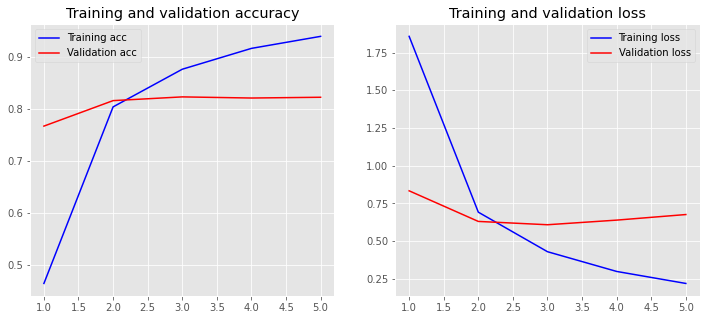

In [90]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [ ]:
y_pred=model.predict(X_test)
ypred_proba=model.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [ ]:
df_tosave=pd.DataFrame(ypred_proba)
path = '/Drive/My Drive/Projet Rakuten'
df_tosave.to_csv(f'{path}/ypred_proba_DnnText_score0_82.csv')

In [78]:
#DNN 2
from keras.models import Sequential
from keras import layers
from time import time

t0 = time()
embedding_dim = 100
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(100, activation='relu'))
#model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(27, activation='softmax'))
model.compile(optimizer=keras.optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=5,
                    #verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=200)

print('Time for DNN2: {} mins'.format(round((time() - t0) / 60, 2)))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 400, 100)          19695900  
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_13 (Dense)             (None, 27)                2727      
Total params: 19,708,727
Trainable params: 19,708,727
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
340/340 [==============================] - 90s 263ms/step - loss: 2.6995 - accuracy: 0.2493 - val_loss: 1.1191 - val_accuracy: 0.6962
Epoch 2/5
174/340 [==============>...............] - ETA: 42s - loss: 0.9701 - accuracy: 0.7302

KeyboardInterrupt: ignored

In [ ]:
#CNN
from time import time

t0 = time()
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 3, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(27, activation='softmax'))
model.compile(optimizer=keras.optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train,
                    epochs=5,
                    #verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=200)

print('Time for CNN: {} mins'.format(round((time() - t0) / 60, 2)))

In [ ]:
#RNN
from time import time

t0 = time()
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Bidirectional(layers.LSTM(64)))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(27, activation='softmax'))
model.compile(optimizer=keras.optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train,
                    epochs=5,
                    #verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=200)

print('Time for CNN: {} mins'.format(round((time() - t0) / 60, 2)))